# **Proyek Akhir Machine Learning: Customer Segmentation** by Rozhak

## **Pendahuluan**

### **Latar Belakang**

Proyek ini merupakan tugas akhir dari kelas "Belajar Machine Learning untuk Pemula" yang diselenggarakan oleh IDCamp 2024. Tujuannya adalah untuk mengaplikasikan pengetahuan tentang *unsupervised learning* dan *supervised learning* dalam sebuah studi kasus nyata.

### **Tujuan Proyek**

Tujuan utama dari notebook ini adalah melakukan segmentasi pelanggan (customer segmentation) berdasarkan data kampanye pemasaran. Proses ini menggunakan pendekatan *unsupervised learning* dengan algoritma K-Means Clustering untuk mengelompokkan pelanggan ke dalam beberapa segmen berbeda berdasarkan karakteristik mereka.

### **Deskripsi Dataset**

Dataset yang digunakan adalah `marketing_campaign.csv`, yang berisi informasi demografis dan perilaku pembelian pelanggan. Dataset ini memiliki beberapa fitur numerik (seperti `Income`, `Age`) dan kategorikal (seperti `Education`).

## **1. Impor Pustaka (Libraries)**

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn > /dev/null 2>&1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-pastel')

## **2. Persiapan Data (Data Preparation)**

### **2.1. Memuat Data (Load Data)**

Langkah pertama adalah memuat dataset dari file `marketing_campaign.csv` ke dalam DataFrame pandas.

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

### **2.2. Analisis Data Eksploratif (Exploratory Data Analysis - EDA)**

EDA dilakukan untuk memahami struktur, distribusi, dan hubungan antar variabel dalam dataset.

**Melihat 5 baris pertama data**

In [ ]:
print("Lima baris pertama dari dataset:")
df.head()

Lima baris pertama dari dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Informasi Umum Dataset**

In [ ]:
print("\nInformasi umum mengenai dataset:")
df.info()


Informasi umum mengenai dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

**Statistik Deskriptif**

Menampilkan ringkasan statistik untuk fitur-fitur numerik.

In [ ]:
print("\nStatistik deskriptif untuk fitur numerik:")
df.describe()


Statistik deskriptif untuk fitur numerik:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Pemeriksaan Data Hilang (Missing Values) dan Duplikat**

In [ ]:
print("\nJumlah data yang hilang per kolom:")
print(df.isnull().sum())

print(f"\nJumlah data duplikat: {df.duplicated().sum()}")


Jumlah data yang hilang per kolom:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Jumlah data duplikat: 0


**Visualisasi Distribusi Fitur**

Kita akan melihat distribusi dari beberapa fitur kunci seperti `Income`, `Age` (yang akan kita buat), dan `Education`.


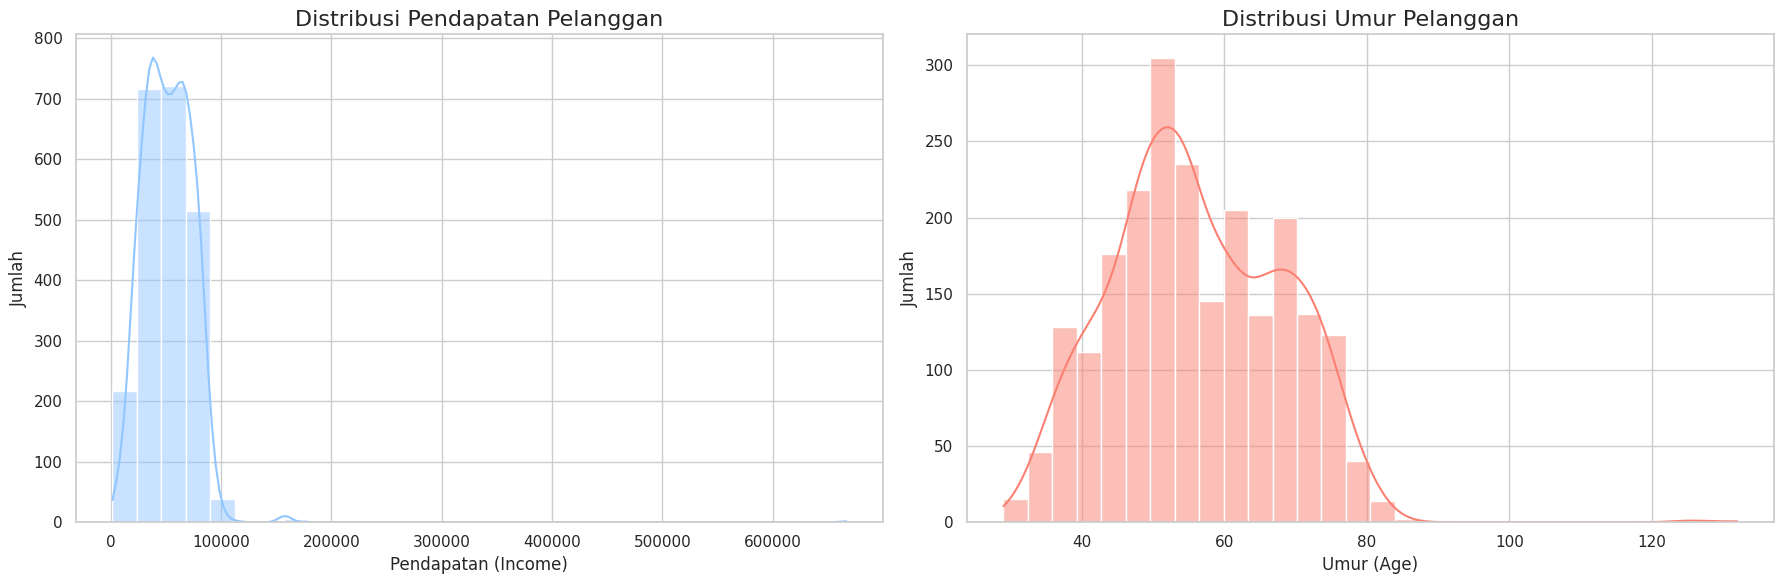

In [ ]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df['Income'].dropna(), kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribusi Pendapatan Pelanggan', fontsize=16)
axes[0].set_xlabel('Pendapatan (Income)', fontsize=12)
axes[0].set_ylabel('Jumlah', fontsize=12)

sns.histplot(df['Age'], kde=True, ax=axes[1], bins=30, color='salmon')
axes[1].set_title('Distribusi Umur Pelanggan', fontsize=16)
axes[1].set_xlabel('Umur (Age)', fontsize=12)
axes[1].set_ylabel('Jumlah', fontsize=12)

plt.tight_layout()
plt.show()

**Visualisasi Korelasi Antar Fitur**

Heatmap korelasi membantu kita memahami hubungan linear antar fitur numerik.

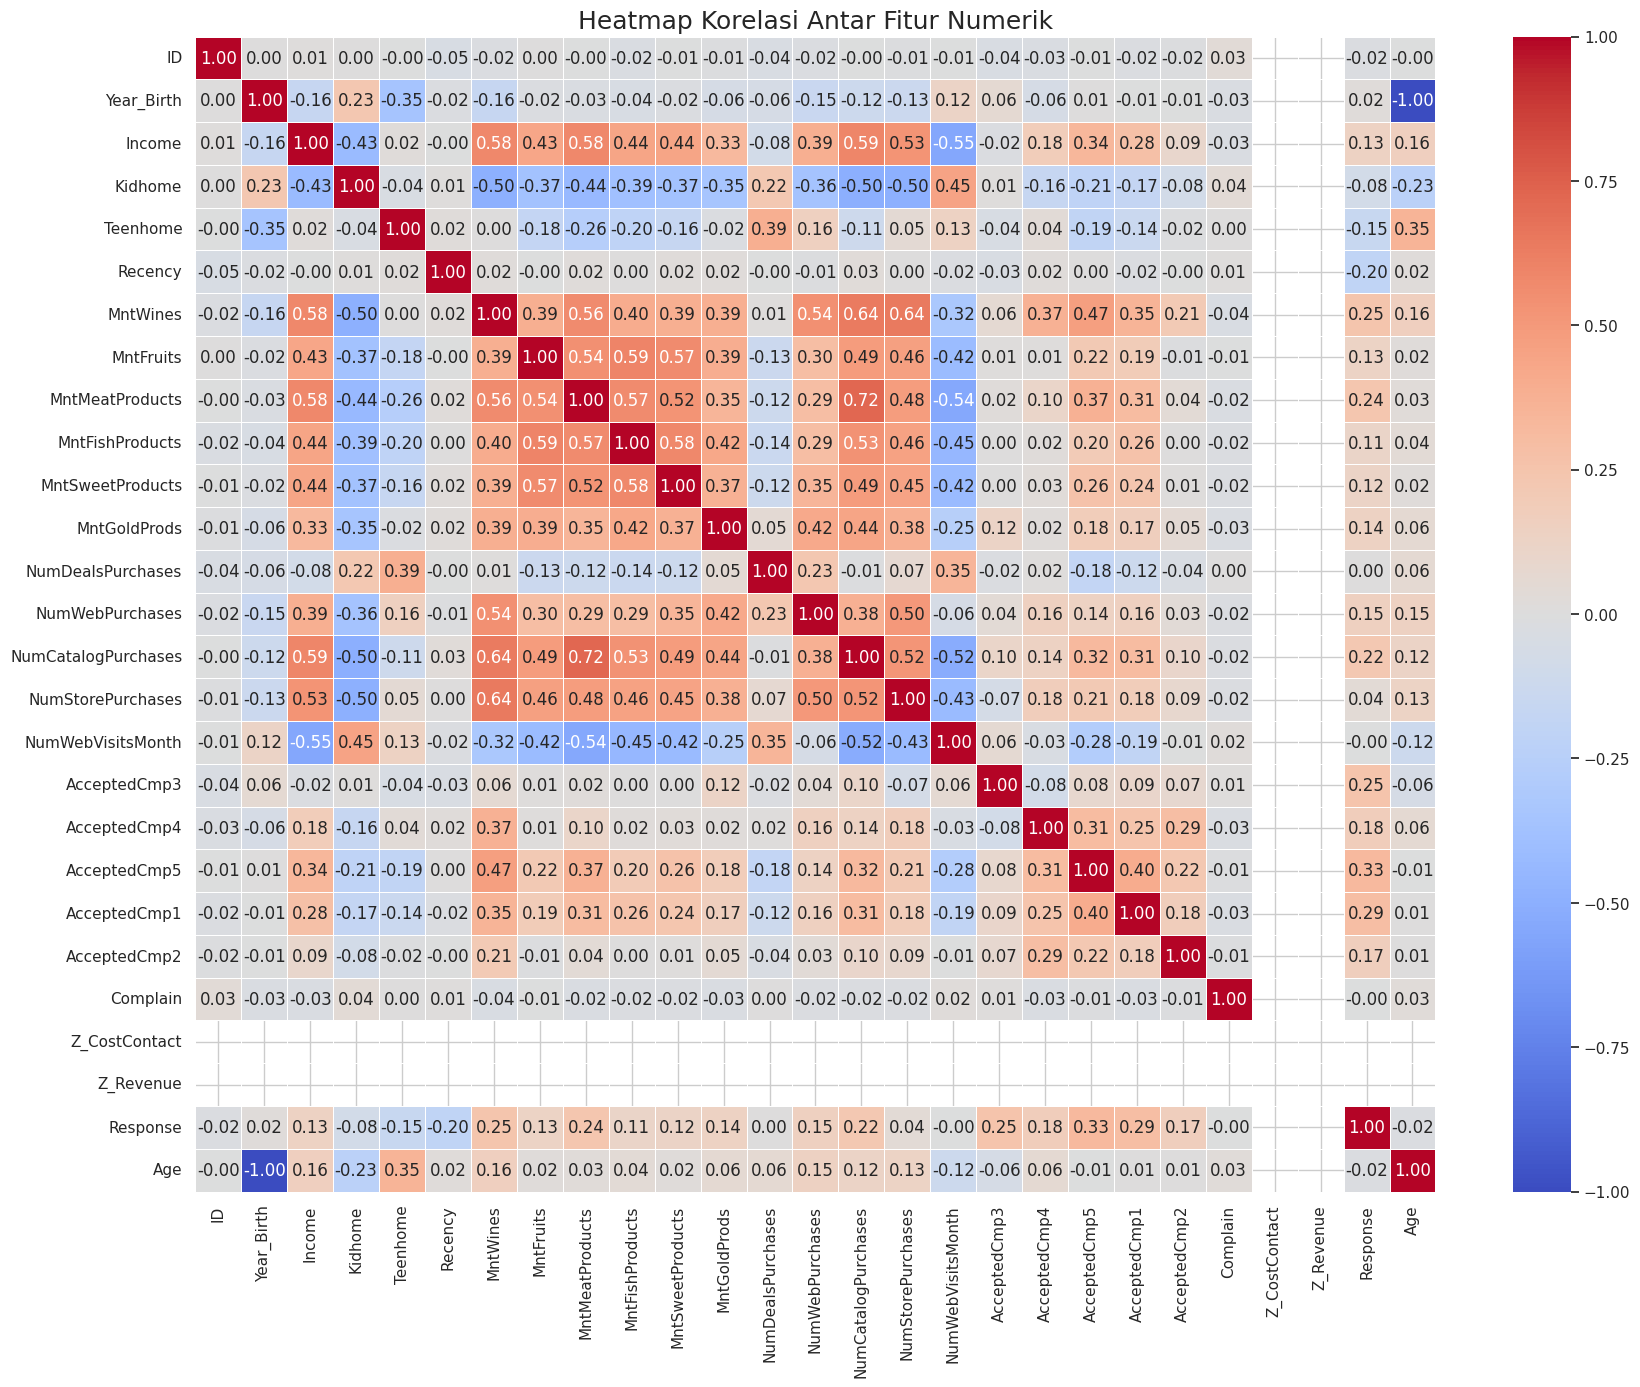

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=18)
plt.show()

### **2.3. Pra-pemrosesan Data (Data Preprocessing)**

Tahap ini meliputi penanganan data hilang, pembuatan fitur baru, *encoding* fitur kategorikal, dan normalisasi fitur numerik.

**Menangani Data Hilang (Missing Values)**

Kolom `Income` memiliki beberapa nilai yang hilang. Kita akan mengisinya dengan nilai median untuk menghindari pengaruh *outlier*.

In [ ]:
income_median = df['Income'].median()
df['Income'] = df['Income'].fillna(income_median)

print(f"Data hilang di kolom 'Income' setelah diisi: {df['Income'].isnull().sum()}")

Data hilang di kolom 'Income' setelah diisi: 0


**Encoding Fitur Kategorikal**

Fitur `Education` perlu diubah menjadi format numerik agar dapat diproses oleh model.


In [ ]:
le = LabelEncoder()
df['Education_Encoded'] = le.fit_transform(df['Education'])

print("\nHasil encoding pada fitur 'Education':")
print(df[['Education', 'Education_Encoded']].head())


Hasil encoding pada fitur 'Education':
    Education  Education_Encoded
0  Graduation                  2
1  Graduation                  2
2  Graduation                  2
3  Graduation                  2
4         PhD                  4


**Normalisasi Fitur Numerik**

Fitur `Income` memiliki rentang nilai yang sangat besar. Normalisasi diperlukan agar fitur ini tidak mendominasi proses clustering.

In [ ]:
minmax_scaler = MinMaxScaler()
df['Income_Normalized'] = minmax_scaler.fit_transform(df[['Income']])

In [ ]:
robust_scaler = RobustScaler()
df['Income_Scaled_Robust'] = robust_scaler.fit_transform(df[['Income']])

print("\nPerbandingan hasil normalisasi 'Income':")
print(df[['Income', 'Income_Normalized', 'Income_Scaled_Robust']].head())


Perbandingan hasil normalisasi 'Income':
    Income  Income_Normalized  Income_Scaled_Robust
0  58138.0           0.084832              0.206299
1  46344.0           0.067095             -0.153812
2  71613.0           0.105097              0.617737
3  26646.0           0.037471             -0.755259
4  58293.0           0.085065              0.211032


## **3. Pemodelan & Evaluasi: Clustering**

### **3.1. Pemilihan Fitur (Feature Selection)**

Berdasarkan analisis sebelumnya, kita akan menggunakan fitur `Income_Normalized`, `Age`, dan `Education_Encoded` untuk proses clustering.

In [ ]:
features_robust = df[['Income_Scaled_Robust', 'Age', 'Education_Encoded']]
print("\nFitur yang digunakan untuk clustering (dengan RobustScaler):")
print(features_robust.head())


Fitur yang digunakan untuk clustering (dengan RobustScaler):
   Income_Scaled_Robust  Age  Education_Encoded
0              0.206299   68                  2
1             -0.153812   71                  2
2              0.617737   60                  2
3             -0.755259   41                  2
4              0.211032   44                  4


### **3.2. Penentuan Jumlah Cluster Optimal**

Kita menggunakan *Silhouette Score* untuk menentukan jumlah cluster (K) yang paling optimal. Skor siluet mengukur seberapa mirip sebuah objek dengan clusternya sendiri dibandingkan dengan cluster lain. Nilai yang lebih tinggi menunjukkan kualitas clustering yang lebih baik.

Jumlah Cluster: 2, Silhouette Score: 0.5813
Jumlah Cluster: 3, Silhouette Score: 0.5337
Jumlah Cluster: 4, Silhouette Score: 0.5015
Jumlah Cluster: 5, Silhouette Score: 0.4745
Jumlah Cluster: 6, Silhouette Score: 0.4787
Jumlah Cluster: 7, Silhouette Score: 0.4533
Jumlah Cluster: 8, Silhouette Score: 0.4329
Jumlah Cluster: 9, Silhouette Score: 0.4324
Jumlah Cluster: 10, Silhouette Score: 0.4152



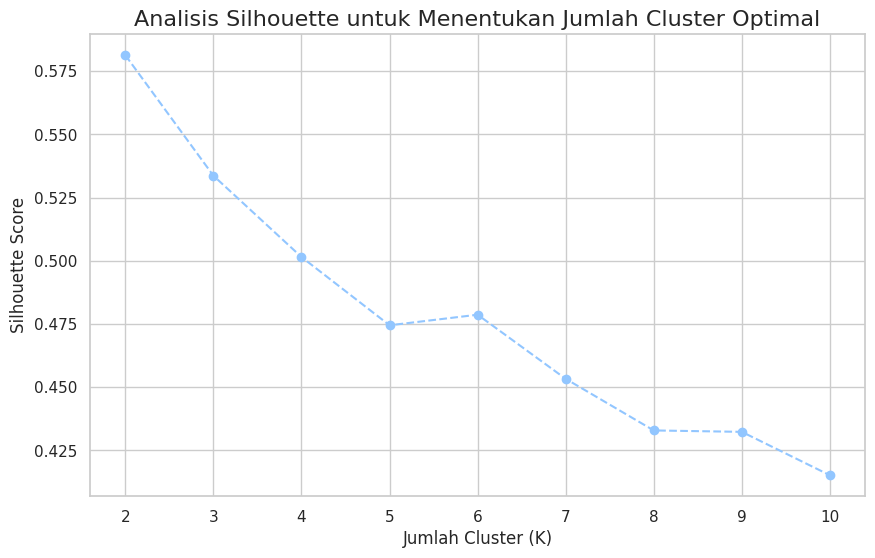


Jumlah cluster optimal berdasarkan Silhouette Score tertinggi adalah: 2


In [ ]:
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(features_robust)
    score = silhouette_score(features_robust, cluster_labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {n_clusters}, Silhouette Score: {score:.4f}")

print("")
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Analisis Silhouette untuk Menentukan Jumlah Cluster Optimal', fontsize=16)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range_n_clusters)
plt.show()

optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score tertinggi adalah: {optimal_clusters}")

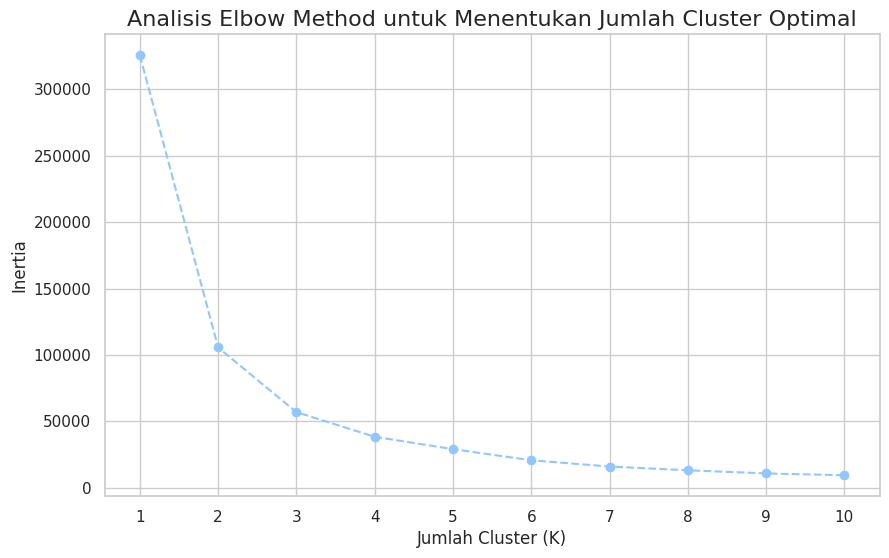

In [ ]:
inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_robust)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Analisis Elbow Method untuk Menentukan Jumlah Cluster Optimal', fontsize=16)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range_n_clusters)
plt.show()

### **3.3. Pelatihan Model K-Means**

Setelah mengetahui jumlah cluster optimal, kita melatih model K-Means dengan jumlah cluster tersebut.

In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(features_robust)

df['Cluster'] = kmeans.labels_

### **3.4. Evaluasi Model Clustering**

Kita hitung kembali *Silhouette Score* untuk model final kita.

In [ ]:
final_silhouette_score = silhouette_score(features_robust, df['Cluster'])
print(f"Silhouette Score untuk model final dengan {optimal_clusters} cluster: {final_silhouette_score:.4f}")

Silhouette Score untuk model final dengan 2 cluster: 0.5813


## **4. Analisis Hasil Clustering**

### **4.1. Pengurangan Dimensi dengan PCA (Opsional, tapi direkomendasikan)**

Untuk memvisualisasikan cluster dalam 2D, kita menggunakan *Principal Component Analysis* (PCA) untuk mengurangi dimensi fitur dari 3 menjadi 2.

In [ ]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_robust)

kmeans_pca = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_pca.fit(features_pca)

df['Cluster_PCA'] = kmeans_pca.labels_

silhouette_pca = silhouette_score(features_pca, df['Cluster_PCA'])
print(f"Silhouette Score setelah PCA: {silhouette_pca:.4f}")

Silhouette Score setelah PCA: 0.5861


### **4.2. Visualisasi Hasil Clustering**

Scatter plot di bawah ini menunjukkan bagaimana pelanggan terdistribusi ke dalam cluster yang berbeda berdasarkan dua komponen utama dari PCA.

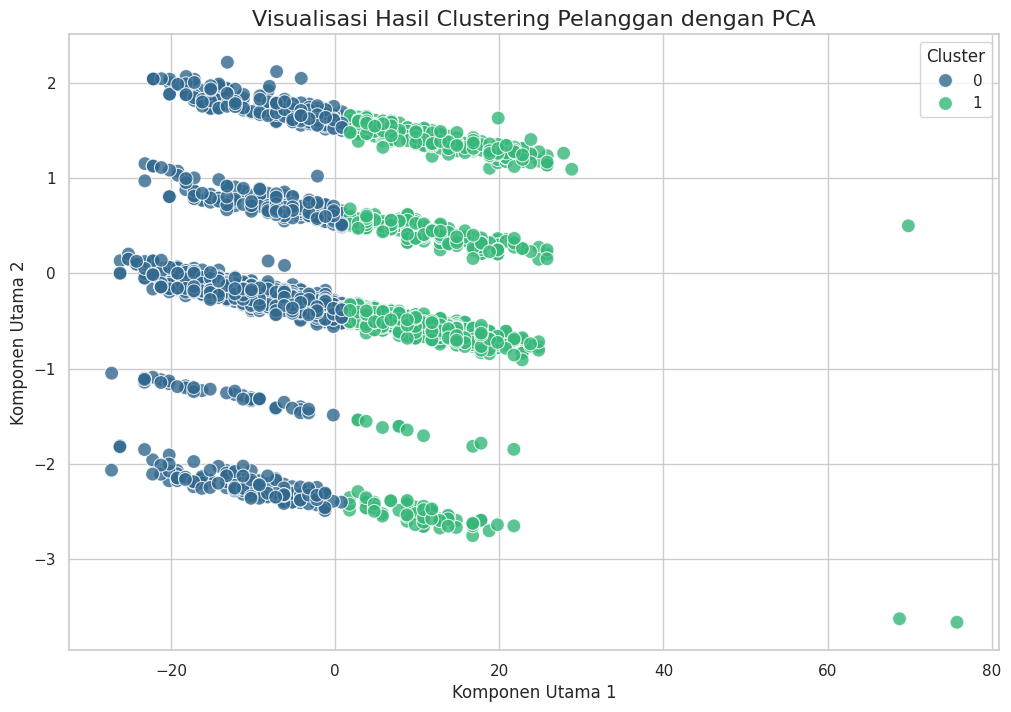

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=df['Cluster_PCA'], palette='viridis', s=100, alpha=0.8)
plt.title('Visualisasi Hasil Clustering Pelanggan dengan PCA', fontsize=16)
plt.xlabel('Komponen Utama 1', fontsize=12)
plt.ylabel('Komponen Utama 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

### **4.3. Interpretasi Cluster**

Sekarang kita analisis karakteristik dari masing-masing cluster untuk memahami profil pelanggan di setiap segmen.

In [ ]:
print("\nAnalisis dan Interpretasi Hasil Cluster:")
for cluster in sorted(df['Cluster_PCA'].unique()):
    cluster_data = df[df['Cluster_PCA'] == cluster]
    print(f"\n---------- [Cluster {cluster}] ----------")
    print(f"Jumlah Pelanggan: {len(cluster_data)}")

    print(cluster_data[['Age', 'Income', 'MntWines', 'MntMeatProducts', 'NumStorePurchases']].describe().round(2))


Analisis dan Interpretasi Hasil Cluster:

---------- [Cluster 0] ----------
Jumlah Pelanggan: 1286
           Age     Income  MntWines  MntMeatProducts  NumStorePurchases
count  1286.00    1286.00   1286.00          1286.00            1286.00
mean     47.66   48979.65    259.60           157.33               5.41
std       6.53   28502.31    327.06           235.76               3.23
min      29.00    1730.00      0.00             0.00               0.00
25%      43.00   31008.00     14.00            13.00               3.00
50%      49.00   44384.50     91.00            50.00               4.00
75%      53.00   66373.00    420.75           195.50               8.00
max      57.00  666666.00   1486.00          1725.00              13.00

---------- [Cluster 1] ----------
Jumlah Pelanggan: 954
          Age     Income  MntWines  MntMeatProducts  NumStorePurchases
count  954.00     954.00    954.00           954.00              954.0
mean    67.70   56630.22    363.71           179.91  

**Ringkasan Interpretasi:**

Berdasarkan hasil analisis deskriptif di atas, kita dapat menyimpulkan profil dari masing-masing cluster:

* **Cluster 0:**
    * **Profil:** Pelanggan di segmen ini berusia lebih muda (rata-rata 47 tahun) dengan pendapatan yang lebih rendah (rata-rata \$48,980).
    * **Perilaku Belanja:** Mereka cenderung memiliki pengeluaran yang lebih rendah di semua kategori produk, terutama untuk anggur dan daging.
    * **Kesimpulan:** Segmen ini dapat dianggap sebagai kelompok pelanggan dengan daya beli lebih rendah atau pelanggan yang lebih baru.

* **Cluster 1:**
    * **Profil:** Segmen ini terdiri dari pelanggan yang lebih tua (rata-rata 67 tahun) dengan pendapatan yang jauh lebih tinggi (rata-rata \$56,630).
    * **Perilaku Belanja:** Mereka menunjukkan pengeluaran yang signifikan lebih tinggi, terutama pada produk anggur dan daging. Mereka juga lebih sering berbelanja di toko.
    * **Kesimpulan:** Ini adalah segmen pelanggan premium atau loyal dengan daya beli tinggi. Mereka adalah target utama untuk produk-produk bernilai tinggi.

## **5. Eksperimen Algoritma Lain: Hierarchical Clustering**

Di bagian ini, kita akan mencoba algoritma *clustering* yang berbeda, yaitu **Hierarchical Clustering**, untuk membandingkan hasilnya dengan K-Means. Kita akan menggunakan fitur yang sama dengan hasil terbaik dari K-Means (`features_robust`).

### **5.1. Import Pustaka & Membuat Dendrogram**

Dendrogram adalah diagram pohon yang digunakan untuk memvisualisasikan hasil dari *hierarchical clustering*. Ini membantu kita untuk menentukan jumlah cluster yang optimal.

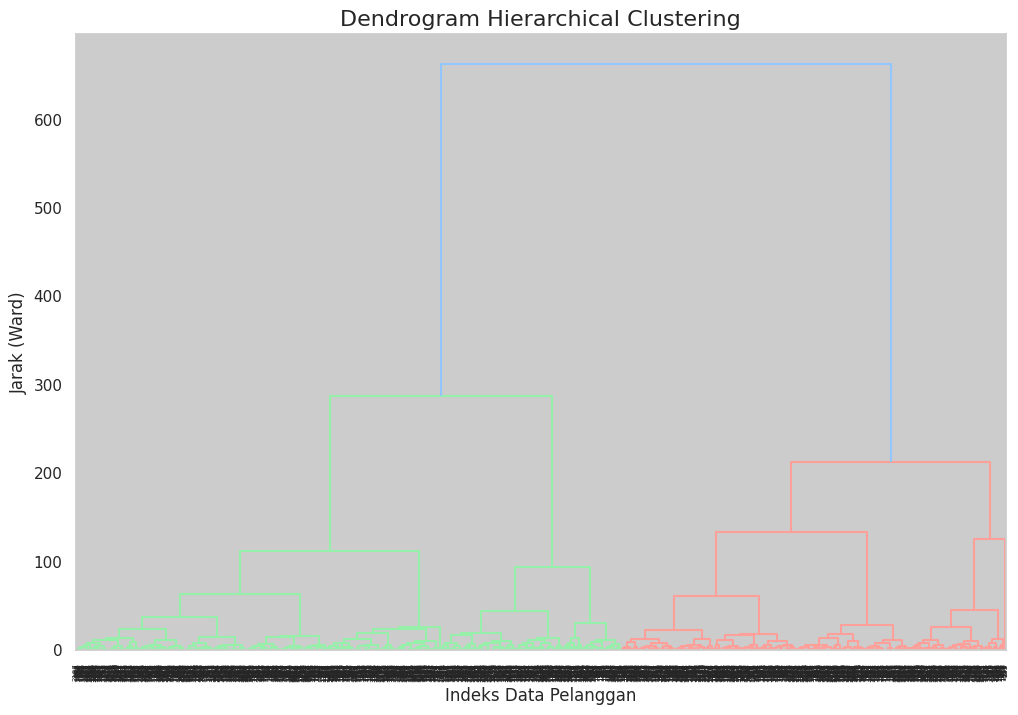

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(features_robust, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram Hierarchical Clustering', fontsize=16)
plt.xlabel('Indeks Data Pelanggan', fontsize=12)
plt.ylabel('Jarak (Ward)', fontsize=12)
plt.show()

### **5.2. Pelatihan Model Hierarchical Clustering**

Berdasarkan dendrogram (dan untuk perbandingan langsung dengan K-Means), kita akan memilih 2 cluster.

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = hierarchical_cluster.fit_predict(features_robust)

silhouette_hierarchical = silhouette_score(features_robust, df['Cluster_Hierarchical'])
print(f"Silhouette Score untuk Hierarchical Clustering dengan 2 cluster: {silhouette_hierarchical:.4f}")

Silhouette Score untuk Hierarchical Clustering dengan 2 cluster: 0.5822


### **5.3. Perbandingan Hasil**

Sekarang kita bandingkan *Silhouette Score* dari kedua algoritma.

In [ ]:
print("--- [Perbandingan Silhouette Score] ---")
print(f"K-Means (dengan RobustScaler): {final_silhouette_score:.4f}")
print(f"Hierarchical Clustering: {silhouette_hierarchical:.4f}")

--- [Perbandingan Silhouette Score] ---
K-Means (dengan RobustScaler): 0.5813
Hierarchical Clustering: 0.5822


## **6. Ekspor Hasil**

Terakhir, kita simpan DataFrame yang sudah berisi label cluster ke dalam file CSV baru. File ini akan digunakan pada tahap selanjutnya, yaitu klasifikasi.

In [ ]:
output_file = "hasil_clustering.csv"
df.to_csv(output_file, index=False)
print(f"\nData dengan label cluster berhasil disimpan ke dalam file: '{output_file}'")


Data dengan label cluster berhasil disimpan ke dalam file: 'hasil_clustering.csv'


In [ ]:
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>